# **Kaggle**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahabziari","key":"5901cffd98e3fce7636781e4b883dad9"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d selfishgene/historical-hourly-weather-data

 42% 5.00M/12.0M [00:00<00:00, 42.8MB/s]
100% 12.0M/12.0M [00:00<00:00, 58.6MB/s]


In [ ]:
!unzip '/content/historical-hourly-weather-data.zip' -d '/content/'

Archive:  /content/historical-hourly-weather-data.zip
  inflating: /content/city_attributes.csv  
  inflating: /content/humidity.csv   
  inflating: /content/pressure.csv   
  inflating: /content/temperature.csv  
  inflating: /content/weather_description.csv  
  inflating: /content/wind_direction.csv  
  inflating: /content/wind_speed.csv  


# **Data**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.metrics import mean_squared_error

In [ ]:
#for prophet
temperature = pd.read_csv('/content/temperature.csv')

In [ ]:
city_attributes = pd.read_csv('/content/city_attributes.csv')
humidity = pd.read_csv('/content/humidity.csv', header=0, index_col=0)
pressure = pd.read_csv('/content/pressure.csv', header=0, index_col=0)
weather_description = pd.read_csv('/content/weather_description.csv', header=0, index_col=0)
wind_direction = pd.read_csv('/content/wind_direction.csv', header=0, index_col=0)
wind_speed = pd.read_csv('/content/wind_speed.csv', header=0, index_col=0)
temperature = pd.read_csv('/content/temperature.csv', header=0, index_col=0)

## **Los Angeles**

### **Merging Data**

In [ ]:
los_temperature = temperature[['Los Angeles']]
los_temperature.rename(columns = {'Los Angeles':'temperature'}, inplace = True)
los_temperature

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,temperature
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,291.870000
2012-10-01 14:00:00,291.868186
2012-10-01 15:00:00,291.862844
2012-10-01 16:00:00,291.857503
...,...
2017-11-29 20:00:00,293.550000
2017-11-29 21:00:00,295.680000
2017-11-29 22:00:00,295.960000


In [ ]:
los_humidity = humidity[['Los Angeles']]
los_humidity.rename(columns = {'Los Angeles':'humidity'}, inplace = True)
los_humidity

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,humidity
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,88.0
2012-10-01 14:00:00,88.0
2012-10-01 15:00:00,88.0
2012-10-01 16:00:00,88.0
...,...
2017-11-29 20:00:00,24.0
2017-11-29 21:00:00,21.0
2017-11-29 22:00:00,23.0


In [ ]:
los_direction = wind_speed[['Los Angeles']]
los_direction.rename(columns = {'Los Angeles':'wind_direction'}, inplace = True)
los_direction

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,wind_direction
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,0.0
2012-10-01 14:00:00,0.0
2012-10-01 15:00:00,0.0
2012-10-01 16:00:00,0.0
...,...
2017-11-29 20:00:00,1.0
2017-11-29 21:00:00,1.0
2017-11-29 22:00:00,1.0


In [ ]:
los_speed = wind_speed[['Los Angeles']]
los_speed.rename(columns = {'Los Angeles':'wind_speed'}, inplace = True)
los_speed

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,wind_speed
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,0.0
2012-10-01 14:00:00,0.0
2012-10-01 15:00:00,0.0
2012-10-01 16:00:00,0.0
...,...
2017-11-29 20:00:00,1.0
2017-11-29 21:00:00,1.0
2017-11-29 22:00:00,1.0


In [ ]:
los_pressure = pressure[['Los Angeles']]
los_pressure.rename(columns = {'Los Angeles':'pressure'}, inplace = True)
los_pressure

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,pressure
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,1013.0
2012-10-01 14:00:00,1013.0
2012-10-01 15:00:00,1013.0
2012-10-01 16:00:00,1013.0
...,...
2017-11-29 20:00:00,1016.0
2017-11-29 21:00:00,1016.0
2017-11-29 22:00:00,1015.0


In [ ]:
data = pd.merge(los_pressure,los_speed ,on="datetime")
data = pd.merge(data,los_temperature ,on="datetime")
data = pd.merge(data,los_direction ,on="datetime")
data = pd.merge(data,los_humidity ,on="datetime")
data

,pressure,wind_speed,temperature,wind_direction,humidity
datetime,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN
2012-10-01 13:00:00,1013.0,0.0,291.870000,0.0,88.0
2012-10-01 14:00:00,1013.0,0.0,291.868186,0.0,88.0
2012-10-01 15:00:00,1013.0,0.0,291.862844,0.0,88.0
2012-10-01 16:00:00,1013.0,0.0,291.857503,0.0,88.0
...,...,...,...,...,...
2017-11-29 20:00:00,1016.0,1.0,293.550000,1.0,24.0
2017-11-29 21:00:00,1016.0,1.0,295.680000,1.0,21.0
2017-11-29 22:00:00,1015.0,1.0,295.960000,1.0,23.0


### **Create New Features**

In [ ]:
data.index = pd.to_datetime(data.index)

In [ ]:
data['season'] = ""
data['year'] = ''
data['month'] = ''
data['hour'] = ''
data

,pressure,wind_speed,temperature,wind_direction,humidity,season,year,month,hour
datetime,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,,,,
2012-10-01 13:00:00,1013.0,0.0,291.870000,0.0,88.0,,,,
2012-10-01 14:00:00,1013.0,0.0,291.868186,0.0,88.0,,,,
2012-10-01 15:00:00,1013.0,0.0,291.862844,0.0,88.0,,,,
2012-10-01 16:00:00,1013.0,0.0,291.857503,0.0,88.0,,,,
...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,1016.0,1.0,293.550000,1.0,24.0,,,,
2017-11-29 21:00:00,1016.0,1.0,295.680000,1.0,21.0,,,,
2017-11-29 22:00:00,1015.0,1.0,295.960000,1.0,23.0,,,,


In [ ]:
for i in range (len(data)):

  if (0<data.index[i].month<=3):
    data.loc[data.index[i],'season'] = 'Winter'
  elif (3<data.index[i].month<=6):
    data.loc[data.index[i],'season'] = 'Spring'
  elif (6<data.index[i].month<=9):
    data.loc[data.index[i],'season'] = 'Summer'
  elif (9<data.index[i].month<=12):
    data.loc[data.index[i],'season'] = 'Fall'

  data.loc[data.index[i],'year'] = data.index[i].year
  data.loc[data.index[i],'month'] =  data.index[i].month
  data.loc[data.index[i],'hour'] = data.index[i].hour

In [ ]:
data

,pressure,wind_speed,temperature,wind_direction,humidity,season,year,month,hour
datetime,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,Fall,2012,10,12
2012-10-01 13:00:00,1013.0,0.0,291.870000,0.0,88.0,Fall,2012,10,13
2012-10-01 14:00:00,1013.0,0.0,291.868186,0.0,88.0,Fall,2012,10,14
2012-10-01 15:00:00,1013.0,0.0,291.862844,0.0,88.0,Fall,2012,10,15
2012-10-01 16:00:00,1013.0,0.0,291.857503,0.0,88.0,Fall,2012,10,16
...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,1016.0,1.0,293.550000,1.0,24.0,Fall,2017,11,20
2017-11-29 21:00:00,1016.0,1.0,295.680000,1.0,21.0,Fall,2017,11,21
2017-11-29 22:00:00,1015.0,1.0,295.960000,1.0,23.0,Fall,2017,11,22


### **Fill Null**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45253 entries, 2012-10-01 12:00:00 to 2017-11-30 00:00:00
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pressure        45001 non-null  float64
 1   wind_speed      45252 non-null  float64
 2   temperature     45250 non-null  float64
 3   wind_direction  45252 non-null  float64
 4   humidity        45101 non-null  float64
 5   season          45253 non-null  object 
 6   year            45253 non-null  object 
 7   month           45253 non-null  object 
 8   hour            45253 non-null  object 
dtypes: float64(5), object(4)
memory usage: 4.7+ MB


In [ ]:
data.fillna(data[['pressure' , 'wind_speed' , 'temperature' , 'wind_direction', 'humidity']].fillna(method='bfill'), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45253 entries, 2012-10-01 12:00:00 to 2017-11-30 00:00:00
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pressure        45253 non-null  float64
 1   wind_speed      45253 non-null  float64
 2   temperature     45253 non-null  float64
 3   wind_direction  45253 non-null  float64
 4   humidity        45253 non-null  float64
 5   season          45253 non-null  object 
 6   year            45253 non-null  object 
 7   month           45253 non-null  object 
 8   hour            45253 non-null  object 
dtypes: float64(5), object(4)
memory usage: 4.7+ MB


## **index=date**

In [ ]:
t = temperature[['Toronto', 'Los Angeles', 'Detroit']]
t

,Toronto,Los Angeles,Detroit
datetime,,,
2012-10-01 12:00:00,NaN,NaN,NaN
2012-10-01 13:00:00,286.260000,291.870000,284.030000
2012-10-01 14:00:00,286.262541,291.868186,284.069789
2012-10-01 15:00:00,286.269518,291.862844,284.173965
2012-10-01 16:00:00,286.276496,291.857503,284.278140
...,...,...,...
2017-11-29 20:00:00,278.740000,293.550000,281.250000
2017-11-29 21:00:00,278.750000,295.680000,281.050000
2017-11-29 22:00:00,277.550000,295.960000,280.170000


In [ ]:
t.fillna(t[['Toronto', 'Los Angeles', 'Detroit']].fillna(method='bfill'), inplace=True)
t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45253 entries, 2012-10-01 12:00:00 to 2017-11-30 00:00:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Toronto      45253 non-null  float64
 1   Los Angeles  45253 non-null  float64
 2   Detroit      45253 non-null  float64
dtypes: float64(3)
memory usage: 1.4+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
for col in t.columns:
  t[col] = round(t[col], 2)
  t[col] = t[col] - 273.15
t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Toronto,Los Angeles,Detroit
datetime,,,
2012-10-01 12:00:00,13.11,18.72,10.88
2012-10-01 13:00:00,13.11,18.72,10.88
2012-10-01 14:00:00,13.11,18.72,10.92
2012-10-01 15:00:00,13.12,18.71,11.02
2012-10-01 16:00:00,13.13,18.71,11.13
...,...,...,...
2017-11-29 20:00:00,5.59,20.40,8.10
2017-11-29 21:00:00,5.60,22.53,7.90
2017-11-29 22:00:00,4.40,22.81,7.02


In [ ]:
t['season'] = ""
t['year'] = ''
t['month'] = ''
t['hour'] = ''
t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Toronto,Los Angeles,Detroit,season,year,month,hour
datetime,,,,,,,
2012-10-01 12:00:00,13.11,18.72,10.88,,,,
2012-10-01 13:00:00,13.11,18.72,10.88,,,,
2012-10-01 14:00:00,13.11,18.72,10.92,,,,
2012-10-01 15:00:00,13.12,18.71,11.02,,,,
2012-10-01 16:00:00,13.13,18.71,11.13,,,,
...,...,...,...,...,...,...,...
2017-11-29 20:00:00,5.59,20.40,8.10,,,,
2017-11-29 21:00:00,5.60,22.53,7.90,,,,
2017-11-29 22:00:00,4.40,22.81,7.02,,,,


In [ ]:
t.index = pd.to_datetime(t.index)

In [ ]:
for i in range (len(t)):

  if ( t.index[i].month ==12 or 0<t.index[i].month<=2):
    t.loc[t.index[i],'season'] = 'Winter'
  elif (2<t.index[i].month<=5):
    t.loc[t.index[i],'season'] = 'Spring'
  elif (5<t.index[i].month<=8):
    t.loc[t.index[i],'season'] = 'Summer'
  elif (8<t.index[i].month<=11):
    t.loc[t.index[i],'season'] = 'Fall'

  t.loc[t.index[i],'year'] = t.index[i].year
  t.loc[t.index[i],'month'] =  t.index[i].month
  t.loc[t.index[i],'hour'] = t.index[i].hour

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
t.sample(10)

,Toronto,Los Angeles,Detroit,season,year,month,hour
datetime,,,,,,,
2013-11-20 13:00:00,10.42,12.12,-2.45,Fall,2013,11,13
2015-07-02 17:00:00,19.30,25.07,20.93,Summer,2015,7,17
2016-03-05 01:00:00,-2.60,17.40,-2.64,Spring,2016,3,1
2016-10-20 10:00:00,12.35,8.33,12.28,Fall,2016,10,10
2013-03-19 02:00:00,-5.22,15.75,-4.13,Spring,2013,3,2
2013-04-26 11:00:00,0.79,13.90,1.12,Spring,2013,4,11
2015-08-08 23:00:00,21.53,27.38,23.12,Summer,2015,8,23
2017-10-02 10:00:00,7.68,18.13,8.10,Fall,2017,10,10
2012-11-19 17:00:00,9.33,16.46,9.78,Fall,2012,11,17


### **Trend , Seasonality , Stationary**

In [ ]:
t['Date'] = pd.to_datetime(t.index.values)
# Set the column 'Date' as index (skip if already done)
t = t.set_index('Date')
# Specify datetime frequency
t = t.asfreq('D')
t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Toronto,Los Angeles,Detroit,season,year,month,hour
Date,,,,,,,
2012-10-01 12:00:00,13.11,18.72,10.88,Fall,2012,10,12
2012-10-02 12:00:00,13.27,18.60,13.21,Fall,2012,10,12
2012-10-03 12:00:00,13.68,20.09,13.16,Fall,2012,10,12
2012-10-04 12:00:00,14.79,18.31,15.49,Fall,2012,10,12
2012-10-05 12:00:00,13.78,16.67,14.49,Fall,2012,10,12
...,...,...,...,...,...,...,...
2017-11-25 12:00:00,8.27,14.68,8.00,Fall,2017,11,12
2017-11-26 12:00:00,0.48,13.43,-2.27,Fall,2017,11,12
2017-11-27 12:00:00,0.73,14.78,1.30,Fall,2017,11,12


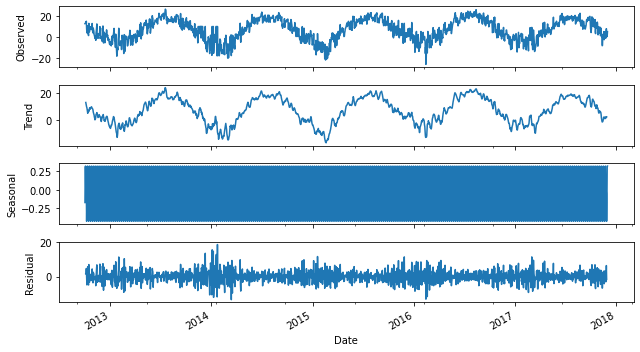

In [ ]:
import statsmodels.api as sm
decompostion = sm.tsa.seasonal_decompose(t['Toronto'],model='additive')
fig = decompostion.plot()
plt.rcParams['figure.figsize'] = [9,5]

In [ ]:
temp = t['year'] == 2016
po = t[temp]
po

,Toronto,Los Angeles,Detroit,season,year,month,hour
datetime,,,,,,,
2016-01-01 00:00:00,0.96,15.93,-0.47,Winter,2016,1,0
2016-01-01 01:00:00,0.94,14.99,-0.62,Winter,2016,1,1
2016-01-01 02:00:00,0.67,8.41,-1.63,Winter,2016,1,2
2016-01-01 03:00:00,0.65,11.12,-0.90,Winter,2016,1,3
2016-01-01 04:00:00,0.42,10.69,-1.29,Winter,2016,1,4
...,...,...,...,...,...,...,...
2016-12-31 19:00:00,3.61,13.50,6.50,Winter,2016,12,19
2016-12-31 20:00:00,3.81,13.18,7.01,Winter,2016,12,20
2016-12-31 21:00:00,4.22,12.81,6.71,Winter,2016,12,21


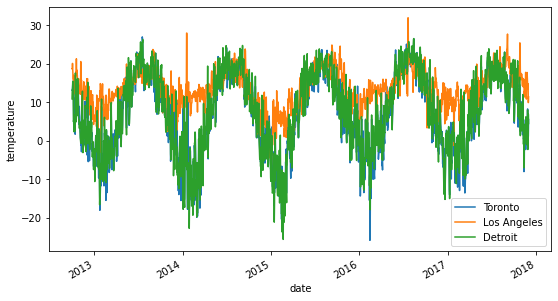

In [ ]:
t['Toronto'].plot(kind="line")
t['Los Angeles'].plot(kind="line")
t['Detroit'].plot(kind="line")
plt.xlabel('date')
plt.ylabel('temperature')
plt.legend()

Text(0, 0.5, 'temperature')

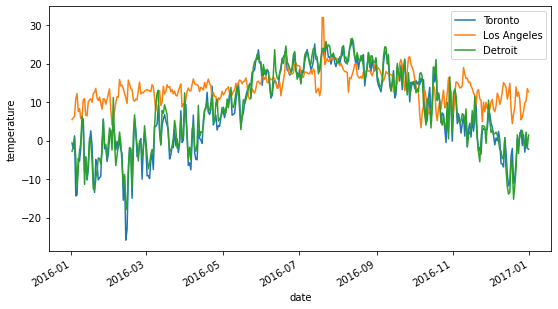

In [ ]:
po['Toronto'].plot(kind="line")
po['Los Angeles'].plot(kind="line")
po['Detroit'].plot(kind="line")
plt.legend()
plt.xlabel('date')
plt.ylabel('temperature')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


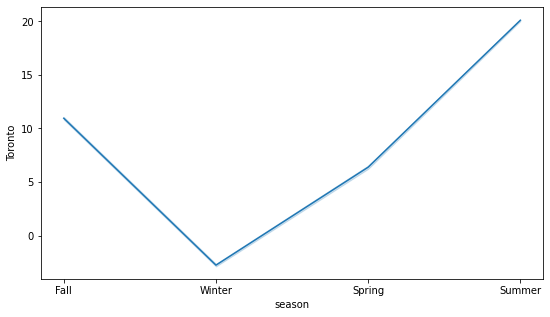

In [ ]:
sns.lineplot(t['season'] , t['Toronto'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


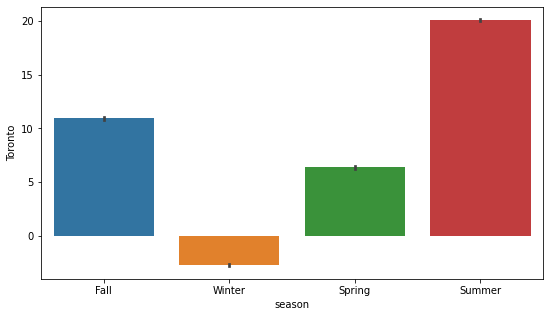

In [ ]:
sns.barplot(t['season'] , t['Toronto'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


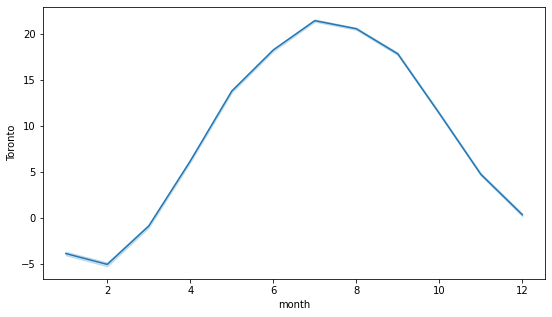

In [ ]:
sns.lineplot(t['month'] , t['Toronto'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


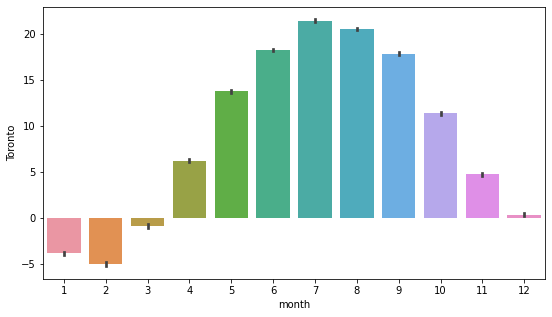

In [ ]:
sns.barplot(t['month'] , t['Toronto'])

In [ ]:
from statsmodels.tsa.stattools import adfuller
X = t['Los Angeles'].values
result = adfuller(X)
print('Los Angeles')
print('ADF Statistic: %f' % result[0])
print('p-value: %.15f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Los Angeles
ADF Statistic: -9.100713
p-value: 0.000000000000004
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [ ]:
X = t['Toronto'].values
result = adfuller(X)
print('Toronto')
print('ADF Statistic: %f' % result[0])
print('p-value: %.9f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Toronto
ADF Statistic: -6.702604
p-value: 0.000000004
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [ ]:
X = t['Detroit'].values
result = adfuller(X)
print('Detroit')
print('ADF Statistic: %f' % result[0])
print('p-value: %.9f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Detroit
ADF Statistic: -7.027062
p-value: 0.000000001
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


## **Datetime as column**

In [ ]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45253 non-null  object 
 1   Vancouver          44458 non-null  float64
 2   Portland           45252 non-null  float64
 3   San Francisco      44460 non-null  float64
 4   Seattle            45250 non-null  float64
 5   Los Angeles        45250 non-null  float64
 6   San Diego          45252 non-null  float64
 7   Las Vegas          45252 non-null  float64
 8   Phoenix            45250 non-null  float64
 9   Albuquerque        45252 non-null  float64
 10  Denver             45252 non-null  float64
 11  San Antonio        45252 non-null  float64
 12  Dallas             45249 non-null  float64
 13  Houston            45250 non-null  float64
 14  Kansas City        45252 non-null  float64
 15  Minneapolis        45240 non-null  float64
 16  Saint Louis        452

In [ ]:
t = temperature[['datetime' , 'Toronto', 'Los Angeles', 'Detroit']]
t

,datetime,Toronto,Los Angeles,Detroit
0,2012-10-01 12:00:00,NaN,NaN,NaN
1,2012-10-01 13:00:00,286.260000,291.870000,284.030000
2,2012-10-01 14:00:00,286.262541,291.868186,284.069789
3,2012-10-01 15:00:00,286.269518,291.862844,284.173965
4,2012-10-01 16:00:00,286.276496,291.857503,284.278140
...,...,...,...,...
45248,2017-11-29 20:00:00,278.740000,293.550000,281.250000
45249,2017-11-29 21:00:00,278.750000,295.680000,281.050000
45250,2017-11-29 22:00:00,277.550000,295.960000,280.170000
45251,2017-11-29 23:00:00,276.160000,295.650000,278.060000


In [ ]:
t.fillna(t[['Toronto', 'Los Angeles', 'Detroit']].fillna(method='bfill'), inplace=True)
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     45253 non-null  object 
 1   Toronto      45253 non-null  float64
 2   Los Angeles  45253 non-null  float64
 3   Detroit      45253 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.4+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
t.columns

Index(['datetime', 'Toronto', 'Los Angeles', 'Detroit'], dtype='object')

In [ ]:
for col in t.columns:
  if(col!='datetime'):
    t[col] = round(t[col], 2)
    t[col] = t[col] - 273.15
t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,datetime,Toronto,Los Angeles,Detroit
0,2012-10-01 12:00:00,13.11,18.72,10.88
1,2012-10-01 13:00:00,13.11,18.72,10.88
2,2012-10-01 14:00:00,13.11,18.72,10.92
3,2012-10-01 15:00:00,13.12,18.71,11.02
4,2012-10-01 16:00:00,13.13,18.71,11.13
...,...,...,...,...
45248,2017-11-29 20:00:00,5.59,20.40,8.10
45249,2017-11-29 21:00:00,5.60,22.53,7.90
45250,2017-11-29 22:00:00,4.40,22.81,7.02
45251,2017-11-29 23:00:00,3.01,22.50,4.91


In [ ]:
t['season'] = ""
t['year'] = ''
t['month'] = ''
t['hour'] = ''
t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,datetime,Toronto,Los Angeles,Detroit,season,year,month,hour
0,2012-10-01 12:00:00,13.11,18.72,10.88,,,,
1,2012-10-01 13:00:00,13.11,18.72,10.88,,,,
2,2012-10-01 14:00:00,13.11,18.72,10.92,,,,
3,2012-10-01 15:00:00,13.12,18.71,11.02,,,,
4,2012-10-01 16:00:00,13.13,18.71,11.13,,,,
...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,5.59,20.40,8.10,,,,
45249,2017-11-29 21:00:00,5.60,22.53,7.90,,,,
45250,2017-11-29 22:00:00,4.40,22.81,7.02,,,,
45251,2017-11-29 23:00:00,3.01,22.50,4.91,,,,


In [ ]:
t['datetime'] = pd.to_datetime(t['datetime'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range (len(t)):

  if (t.loc[t.index[i],'datetime'].month == 12 or 0<t.loc[t.index[i],'datetime'].month<=2):
    t.loc[t.index[i],'season'] = 'Winter'
  elif (2<t.loc[t.index[i],'datetime'].month<=5):
    t.loc[t.index[i],'season'] = 'Spring'
  elif (5<t.loc[t.index[i],'datetime'].month<=8):
    t.loc[t.index[i],'season'] = 'Summer'
  elif (8<t.loc[t.index[i],'datetime'].month<=11):
    t.loc[t.index[i],'season'] = 'Fall'

  t.loc[t.index[i],'year'] = t.loc[t.index[i],'datetime'].year
  t.loc[t.index[i],'month'] = t.loc[t.index[i],'datetime'].month
  t.loc[t.index[i],'hour'] = t.loc[t.index[i],'datetime'].hour

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
t

,datetime,Toronto,Los Angeles,Detroit,season,year,month,hour
0,2012-10-01 12:00:00,13.11,18.72,10.88,Fall,2012,10,12
1,2012-10-01 13:00:00,13.11,18.72,10.88,Fall,2012,10,13
2,2012-10-01 14:00:00,13.11,18.72,10.92,Fall,2012,10,14
3,2012-10-01 15:00:00,13.12,18.71,11.02,Fall,2012,10,15
4,2012-10-01 16:00:00,13.13,18.71,11.13,Fall,2012,10,16
...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,5.59,20.40,8.10,Fall,2017,11,20
45249,2017-11-29 21:00:00,5.60,22.53,7.90,Fall,2017,11,21
45250,2017-11-29 22:00:00,4.40,22.81,7.02,Fall,2017,11,22
45251,2017-11-29 23:00:00,3.01,22.50,4.91,Fall,2017,11,23


### **Season , Trend , ADF**

In [ ]:
t['Date'] = pd.to_datetime(t.index.values)
# Set the column 'Date' as index (skip if already done)
t = t.set_index('Date')
# Specify datetime frequency
t = t.asfreq('D')
t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Toronto,Los Angeles,Detroit,season,year,month,hour
Date,,,,,,,
2012-10-01 12:00:00,13.11,18.72,10.88,Fall,2012,10,12
2012-10-02 12:00:00,13.27,18.60,13.21,Fall,2012,10,12
2012-10-03 12:00:00,13.68,20.09,13.16,Fall,2012,10,12
2012-10-04 12:00:00,14.79,18.31,15.49,Fall,2012,10,12
2012-10-05 12:00:00,13.78,16.67,14.49,Fall,2012,10,12
...,...,...,...,...,...,...,...
2017-11-25 12:00:00,8.27,14.68,8.00,Fall,2017,11,12
2017-11-26 12:00:00,0.48,13.43,-2.27,Fall,2017,11,12
2017-11-27 12:00:00,0.73,14.78,1.30,Fall,2017,11,12


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


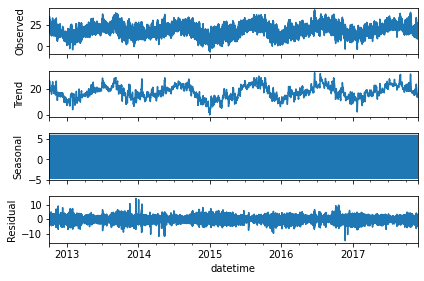

In [ ]:
import statsmodels.api as sm
decompostion = sm.tsa.seasonal_decompose(t['Los Angeles'],model='additive')
fig = decompostion.plot()
plt.rcParams['figure.figsize'] = [9,5]

In [ ]:
from statsmodels.tsa.stattools import adfuller
X = t['Los Angeles'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.805801
p-value: 0.002849
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
X = t['Toronto'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.561128
p-value: 0.101300
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
X = t['Detroit'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.237470
p-value: 0.192928
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


## **Season , Year Changes**

In [ ]:
temp = data['year'] == 2016
d16 = data[temp]
d16

,datetime,pressure,wind_speed,temperature,wind_direction,humidity,season,year
28476,2016-01-01 00:00:00,1018.0,3.0,289.078882,3.0,17.0,Winter,2016
28477,2016-01-01 01:00:00,1018.0,5.0,288.140000,5.0,22.0,Winter,2016
28478,2016-01-01 02:00:00,1025.0,3.0,281.564463,3.0,33.0,Winter,2016
28479,2016-01-01 03:00:00,1018.0,1.0,284.270000,1.0,21.0,Winter,2016
28480,2016-01-01 04:00:00,1018.0,1.0,283.842320,1.0,27.0,Winter,2016
...,...,...,...,...,...,...,...,...
37255,2016-12-31 19:00:00,1015.0,3.0,286.650000,3.0,82.0,Fall,2016
37256,2016-12-31 20:00:00,1014.0,1.0,286.330000,1.0,76.0,Fall,2016
37257,2016-12-31 21:00:00,1013.0,4.0,285.960000,4.0,87.0,Fall,2016
37258,2016-12-31 22:00:00,1012.0,1.0,285.460000,1.0,93.0,Fall,2016


In [ ]:
d16.index

Int64Index([28476, 28477, 28478, 28479, 28480, 28481, 28482, 28483, 28484,
            28485,
            ...
            37250, 37251, 37252, 37253, 37254, 37255, 37256, 37257, 37258,
            37259],
           dtype='int64', length=8784)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


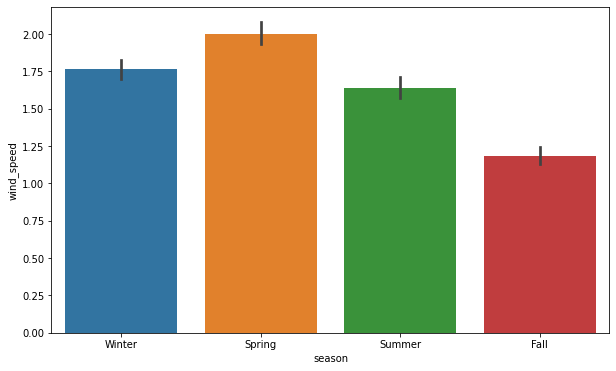

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot('season' , 'wind_speed' , data= d16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


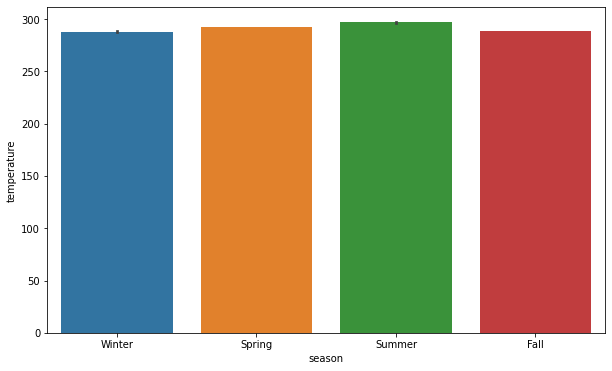

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot('season' , 'temperature' , data= d16)

In [ ]:
temp = data['year'] == 2015
d15 = data[temp]
d15

,datetime,pressure,wind_speed,temperature,wind_direction,humidity,season,year
19716,2015-01-01 00:00:00,1030.0,2.0,276.988500,2.0,39.0,Winter,2015
19717,2015-01-01 01:00:00,1030.0,2.0,277.518333,2.0,39.0,Winter,2015
19718,2015-01-01 02:00:00,1030.0,1.0,276.311667,1.0,38.0,Winter,2015
19719,2015-01-01 03:00:00,1030.0,1.0,274.348000,1.0,48.0,Winter,2015
19720,2015-01-01 04:00:00,1031.0,1.0,273.393667,1.0,43.0,Winter,2015
...,...,...,...,...,...,...,...,...
28471,2015-12-31 19:00:00,1021.0,1.0,289.170000,1.0,25.0,Fall,2015
28472,2015-12-31 20:00:00,1021.0,1.0,289.149752,1.0,24.0,Fall,2015
28473,2015-12-31 21:00:00,1020.0,2.0,289.510000,2.0,17.0,Fall,2015
28474,2015-12-31 22:00:00,1019.0,2.0,289.740890,2.0,15.0,Fall,2015


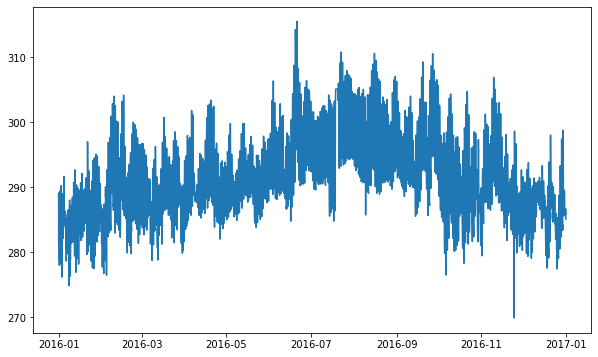

In [ ]:
plt.figure(figsize=(10,6))
plt.plot('datetime' , 'temperature' , data= d16)

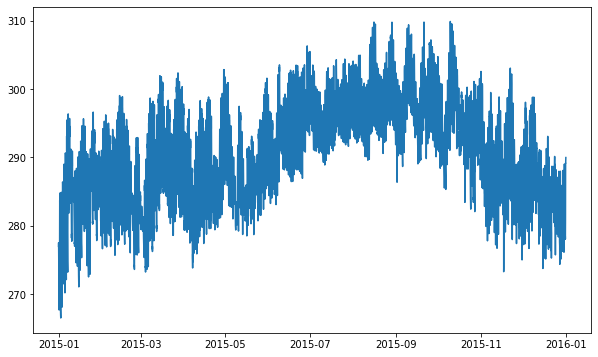

In [ ]:
plt.figure(figsize=(10,6))
plt.plot('datetime' , 'temperature' , data= d15)

In [ ]:
from statsmodels.tsa.stattools import adfuller
X = d16['temperature'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.785503
p-value: 0.000058
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


# **Model**

## **split for prophet**

In [ ]:
temp = t['year'] == 2017
test = t[temp]
test

,datetime,Toronto,Los Angeles,Detroit,season,year,month,hour
37260,2017-01-01 00:00:00,2.44,11.56,4.01,Winter,2017,1,0
37261,2017-01-01 01:00:00,2.19,10.87,2.50,Winter,2017,1,1
37262,2017-01-01 02:00:00,2.41,10.59,2.44,Winter,2017,1,2
37263,2017-01-01 03:00:00,2.42,9.92,1.40,Winter,2017,1,3
37264,2017-01-01 04:00:00,1.77,9.79,1.33,Winter,2017,1,4
...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,5.59,20.40,8.10,Fall,2017,11,20
45249,2017-11-29 21:00:00,5.60,22.53,7.90,Fall,2017,11,21
45250,2017-11-29 22:00:00,4.40,22.81,7.02,Fall,2017,11,22
45251,2017-11-29 23:00:00,3.01,22.50,4.91,Fall,2017,11,23


In [ ]:
temp = t['year'] != 2017
train = t[temp]
train

,datetime,Toronto,Los Angeles,Detroit,season,year,month,hour
0,2012-10-01 12:00:00,13.11,18.72,10.88,Fall,2012,10,12
1,2012-10-01 13:00:00,13.11,18.72,10.88,Fall,2012,10,13
2,2012-10-01 14:00:00,13.11,18.72,10.92,Fall,2012,10,14
3,2012-10-01 15:00:00,13.12,18.71,11.02,Fall,2012,10,15
4,2012-10-01 16:00:00,13.13,18.71,11.13,Fall,2012,10,16
...,...,...,...,...,...,...,...,...
37255,2016-12-31 19:00:00,3.61,13.50,6.50,Winter,2016,12,19
37256,2016-12-31 20:00:00,3.81,13.18,7.01,Winter,2016,12,20
37257,2016-12-31 21:00:00,4.22,12.81,6.71,Winter,2016,12,21
37258,2016-12-31 22:00:00,3.82,12.31,6.12,Winter,2016,12,22


In [ ]:
#univariate
train2 = pd.DataFrame(train[['datetime','Toronto']])
test2 = pd.DataFrame(test[['datetime','Toronto']])
print(train2.shape)
print(test2.shape)

(37260, 2)
(7993, 2)


In [ ]:
test2

,datetime,Toronto
37260,2017-01-01 00:00:00,2.44
37261,2017-01-01 01:00:00,2.19
37262,2017-01-01 02:00:00,2.41
37263,2017-01-01 03:00:00,2.42
37264,2017-01-01 04:00:00,1.77
...,...,...
45248,2017-11-29 20:00:00,5.59
45249,2017-11-29 21:00:00,5.60
45250,2017-11-29 22:00:00,4.40
45251,2017-11-29 23:00:00,3.01


## **Split for Arima**

### **all of data**

In [ ]:
temp = t['year'] == 2017
test = t[temp]
test

,Toronto,Los Angeles,Detroit,season,year,month,hour
datetime,,,,,,,
2017-01-01 00:00:00,2.44,11.56,4.01,Winter,2017,1,0
2017-01-01 01:00:00,2.19,10.87,2.50,Winter,2017,1,1
2017-01-01 02:00:00,2.41,10.59,2.44,Winter,2017,1,2
2017-01-01 03:00:00,2.42,9.92,1.40,Winter,2017,1,3
2017-01-01 04:00:00,1.77,9.79,1.33,Winter,2017,1,4
...,...,...,...,...,...,...,...
2017-11-29 20:00:00,5.59,20.40,8.10,Fall,2017,11,20
2017-11-29 21:00:00,5.60,22.53,7.90,Fall,2017,11,21
2017-11-29 22:00:00,4.40,22.81,7.02,Fall,2017,11,22


In [ ]:
temp = t['year'] != 2017
train = t[temp]
train

,Toronto,Los Angeles,Detroit,season,year,month,hour
datetime,,,,,,,
2012-10-01 12:00:00,13.11,18.72,10.88,Fall,2012,10,12
2012-10-01 13:00:00,13.11,18.72,10.88,Fall,2012,10,13
2012-10-01 14:00:00,13.11,18.72,10.92,Fall,2012,10,14
2012-10-01 15:00:00,13.12,18.71,11.02,Fall,2012,10,15
2012-10-01 16:00:00,13.13,18.71,11.13,Fall,2012,10,16
...,...,...,...,...,...,...,...
2016-12-31 19:00:00,3.61,13.50,6.50,Winter,2016,12,19
2016-12-31 20:00:00,3.81,13.18,7.01,Winter,2016,12,20
2016-12-31 21:00:00,4.22,12.81,6.71,Winter,2016,12,21


In [ ]:
#univariate
train2 = pd.DataFrame(train[['Los Angeles']])
test2 = pd.DataFrame(test[['Los Angeles']])
print(train2.shape)
print(test2.shape)

(37260, 1)
(7993, 1)


### **sample**

In [ ]:
t

,Toronto,Los Angeles,Detroit,season,year,month,hour
datetime,,,,,,,
2012-10-01 12:00:00,13.11,18.72,10.88,Fall,2012,10,12
2012-10-01 13:00:00,13.11,18.72,10.88,Fall,2012,10,13
2012-10-01 14:00:00,13.11,18.72,10.92,Fall,2012,10,14
2012-10-01 15:00:00,13.12,18.71,11.02,Fall,2012,10,15
2012-10-01 16:00:00,13.13,18.71,11.13,Fall,2012,10,16
...,...,...,...,...,...,...,...
2017-11-29 20:00:00,5.59,20.40,8.10,Fall,2017,11,20
2017-11-29 21:00:00,5.60,22.53,7.90,Fall,2017,11,21
2017-11-29 22:00:00,4.40,22.81,7.02,Fall,2017,11,22


In [ ]:
train = t.iloc[:45253-300]
test = t.iloc[-300:]
train

,Toronto,Los Angeles,Detroit,season,year,month,hour
datetime,,,,,,,
2012-10-01 12:00:00,13.11,18.72,10.88,Fall,2012,10,12
2012-10-01 13:00:00,13.11,18.72,10.88,Fall,2012,10,13
2012-10-01 14:00:00,13.11,18.72,10.92,Fall,2012,10,14
2012-10-01 15:00:00,13.12,18.71,11.02,Fall,2012,10,15
2012-10-01 16:00:00,13.13,18.71,11.13,Fall,2012,10,16
...,...,...,...,...,...,...,...
2017-11-17 08:00:00,-1.01,18.62,0.59,Fall,2017,11,8
2017-11-17 09:00:00,-1.30,18.23,0.76,Fall,2017,11,9
2017-11-17 10:00:00,-1.26,17.61,0.89,Fall,2017,11,10


In [ ]:
test

,Toronto,Los Angeles,Detroit,season,year,month,hour
datetime,,,,,,,
2017-11-17 13:00:00,-2.21,17.28,1.55,Fall,2017,11,13
2017-11-17 14:00:00,-2.19,17.14,1.49,Fall,2017,11,14
2017-11-17 15:00:00,-1.58,17.00,2.40,Fall,2017,11,15
2017-11-17 16:00:00,-0.99,17.06,2.99,Fall,2017,11,16
2017-11-17 17:00:00,0.21,17.26,3.69,Fall,2017,11,17
...,...,...,...,...,...,...,...
2017-11-29 20:00:00,5.59,20.40,8.10,Fall,2017,11,20
2017-11-29 21:00:00,5.60,22.53,7.90,Fall,2017,11,21
2017-11-29 22:00:00,4.40,22.81,7.02,Fall,2017,11,22


In [ ]:
#univariate
train2 = pd.DataFrame(train[['Los Angeles']])
test2 = pd.DataFrame(test[['Los Angeles']])
print(train2.shape)
print(test2.shape)

(44953, 1)
(300, 1)


## **Los Angles**

In [ ]:
trainX = train.drop(columns=['temperature'])
trainy = pd.DataFrame(train['temperature'])
testX = test.drop(columns=['temperature'])
testy = pd.DataFrame(test['temperature'])
print(trainX.shape)
print(testX.shape)
print(trainy.shape)
print(testy.shape)

(37260, 9)
(7993, 9)
(37260, 1)
(7993, 1)


In [ ]:
temp = data['year'] == 2017
test = data[temp]
test

,datetime,pressure,wind_speed,temperature,wind_direction,humidity,season,year,month,hour
37260,2017-01-01 00:00:00,1012.0,3.0,284.71,3.0,81.0,Winter,2017,1,0
37261,2017-01-01 01:00:00,1012.0,4.0,284.02,4.0,76.0,Winter,2017,1,1
37262,2017-01-01 02:00:00,1012.0,2.0,283.74,2.0,87.0,Winter,2017,1,2
37263,2017-01-01 03:00:00,1012.0,1.0,283.07,1.0,81.0,Winter,2017,1,3
37264,2017-01-01 04:00:00,1011.0,2.0,282.94,2.0,93.0,Winter,2017,1,4
...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,1016.0,1.0,293.55,1.0,24.0,Fall,2017,11,20
45249,2017-11-29 21:00:00,1016.0,1.0,295.68,1.0,21.0,Fall,2017,11,21
45250,2017-11-29 22:00:00,1015.0,1.0,295.96,1.0,23.0,Fall,2017,11,22
45251,2017-11-29 23:00:00,1016.0,2.0,295.65,2.0,14.0,Fall,2017,11,23


In [ ]:
temp = data['year'] != 2017
train = data[temp]
train

,datetime,pressure,wind_speed,temperature,wind_direction,humidity,season,year,month,hour
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,Fall,2012,10,12
1,2012-10-01 13:00:00,1013.0,0.0,291.870000,0.0,88.0,Fall,2012,10,13
2,2012-10-01 14:00:00,1013.0,0.0,291.868186,0.0,88.0,Fall,2012,10,14
3,2012-10-01 15:00:00,1013.0,0.0,291.862844,0.0,88.0,Fall,2012,10,15
4,2012-10-01 16:00:00,1013.0,0.0,291.857503,0.0,88.0,Fall,2012,10,16
...,...,...,...,...,...,...,...,...,...,...
37255,2016-12-31 19:00:00,1015.0,3.0,286.650000,3.0,82.0,Fall,2016,12,19
37256,2016-12-31 20:00:00,1014.0,1.0,286.330000,1.0,76.0,Fall,2016,12,20
37257,2016-12-31 21:00:00,1013.0,4.0,285.960000,4.0,87.0,Fall,2016,12,21
37258,2016-12-31 22:00:00,1012.0,1.0,285.460000,1.0,93.0,Fall,2016,12,22


In [ ]:
train1 = pd.DataFrame(train[['datetime','temperature']])
test1 = pd.DataFrame(test[['datetime','temperature']])
print(train1.shape)
print(test1.shape)

(37260, 2)
(7993, 2)


## **Split For RNN & CNN**

In [ ]:
newt = pd.DataFrame({
    "t_20": t["Los Angeles"].shift(20), 
    "t_19": t["Los Angeles"].shift(19), 
    "t_18": t["Los Angeles"].shift(18), 
    "t_17": t["Los Angeles"].shift(17), 
    "t_16": t["Los Angeles"].shift(16), 
    "t_15": t["Los Angeles"].shift(15), 
    "t_14": t["Los Angeles"].shift(14), 
    "t_13": t["Los Angeles"].shift(13), 
    "t_12": t["Los Angeles"].shift(12), 
    "t_11": t["Los Angeles"].shift(11), 
    "t_10": t["Los Angeles"].shift(10), 
    "t_9": t["Los Angeles"].shift(9), 
    "t_8": t["Los Angeles"].shift(8), 
    "t_7": t["Los Angeles"].shift(7), 
    "t_6": t["Los Angeles"].shift(6), 
    "t_5": t["Los Angeles"].shift(5), 
    "t_4": t["Los Angeles"].shift(4), 
    "t_3": t["Los Angeles"].shift(3), 
    "t_2": t["Los Angeles"].shift(2), 
    "t_1": t["Los Angeles"].shift(), 
    "Los Angeles": t["Los Angeles"]
})

In [ ]:
newt.dropna(inplace=True,axis=0)
newt

,t_20,t_19,t_18,t_17,t_16,t_15,t_14,t_13,t_12,t_11,t_10,t_9,t_8,t_7,t_6,t_5,t_4,t_3,t_2,t_1,Los Angeles
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-02 08:00:00,18.72,18.72,18.72,18.71,18.71,18.70,18.70,18.69,18.69,18.68,18.68,18.67,18.66,18.66,18.65,18.65,18.64,18.64,18.63,18.63,18.62
2012-10-02 09:00:00,18.72,18.72,18.71,18.71,18.70,18.70,18.69,18.69,18.68,18.68,18.67,18.66,18.66,18.65,18.65,18.64,18.64,18.63,18.63,18.62,18.62
2012-10-02 10:00:00,18.72,18.71,18.71,18.70,18.70,18.69,18.69,18.68,18.68,18.67,18.66,18.66,18.65,18.65,18.64,18.64,18.63,18.63,18.62,18.62,18.61
2012-10-02 11:00:00,18.71,18.71,18.70,18.70,18.69,18.69,18.68,18.68,18.67,18.66,18.66,18.65,18.65,18.64,18.64,18.63,18.63,18.62,18.62,18.61,18.61
2012-10-02 12:00:00,18.71,18.70,18.70,18.69,18.69,18.68,18.68,18.67,18.66,18.66,18.65,18.65,18.64,18.64,18.63,18.63,18.62,18.62,18.61,18.61,18.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,22.33,20.61,19.32,18.06,17.27,16.19,15.92,15.27,14.07,13.40,13.07,12.07,11.40,11.07,10.48,10.06,9.78,12.49,15.87,18.88,20.40
2017-11-29 21:00:00,20.61,19.32,18.06,17.27,16.19,15.92,15.27,14.07,13.40,13.07,12.07,11.40,11.07,10.48,10.06,9.78,12.49,15.87,18.88,20.40,22.53
2017-11-29 22:00:00,19.32,18.06,17.27,16.19,15.92,15.27,14.07,13.40,13.07,12.07,11.40,11.07,10.48,10.06,9.78,12.49,15.87,18.88,20.40,22.53,22.81


In [ ]:
X = newt.drop(columns=['Los Angeles'])
y = pd.DataFrame(newt['Los Angeles'])
X

,t_20,t_19,t_18,t_17,t_16,t_15,t_14,t_13,t_12,t_11,t_10,t_9,t_8,t_7,t_6,t_5,t_4,t_3,t_2,t_1
datetime,,,,,,,,,,,,,,,,,,,,
2012-10-02 08:00:00,18.72,18.72,18.72,18.71,18.71,18.70,18.70,18.69,18.69,18.68,18.68,18.67,18.66,18.66,18.65,18.65,18.64,18.64,18.63,18.63
2012-10-02 09:00:00,18.72,18.72,18.71,18.71,18.70,18.70,18.69,18.69,18.68,18.68,18.67,18.66,18.66,18.65,18.65,18.64,18.64,18.63,18.63,18.62
2012-10-02 10:00:00,18.72,18.71,18.71,18.70,18.70,18.69,18.69,18.68,18.68,18.67,18.66,18.66,18.65,18.65,18.64,18.64,18.63,18.63,18.62,18.62
2012-10-02 11:00:00,18.71,18.71,18.70,18.70,18.69,18.69,18.68,18.68,18.67,18.66,18.66,18.65,18.65,18.64,18.64,18.63,18.63,18.62,18.62,18.61
2012-10-02 12:00:00,18.71,18.70,18.70,18.69,18.69,18.68,18.68,18.67,18.66,18.66,18.65,18.65,18.64,18.64,18.63,18.63,18.62,18.62,18.61,18.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,22.33,20.61,19.32,18.06,17.27,16.19,15.92,15.27,14.07,13.40,13.07,12.07,11.40,11.07,10.48,10.06,9.78,12.49,15.87,18.88
2017-11-29 21:00:00,20.61,19.32,18.06,17.27,16.19,15.92,15.27,14.07,13.40,13.07,12.07,11.40,11.07,10.48,10.06,9.78,12.49,15.87,18.88,20.40
2017-11-29 22:00:00,19.32,18.06,17.27,16.19,15.92,15.27,14.07,13.40,13.07,12.07,11.40,11.07,10.48,10.06,9.78,12.49,15.87,18.88,20.40,22.53


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=2,
    gap=1,
    max_train_size=10000,
    test_size=2000,
)

In [ ]:
all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[0]

In [ ]:
X_train = X.iloc[train_0]
y_train = y.iloc[train_0]
y_train

,Los Angeles
datetime,
2016-04-25 16:00:00,15.44
2016-04-25 17:00:00,17.29
2016-04-25 18:00:00,18.02
2016-04-25 19:00:00,18.03
2016-04-25 20:00:00,18.30
...,...
2017-06-16 03:00:00,26.08
2017-06-16 04:00:00,24.20
2017-06-16 05:00:00,22.87


In [ ]:
X_test = X.iloc[test_0]
y_test = y.iloc[test_0]

## **Scale**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
X_test = sc.fit_transform(X_test)
y_test = sc.fit_transform(y_test)
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_test)

## **Auto Regression**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.



                             ARIMA Model Results                              
Dep. Variable:          D.Los Angeles   No. Observations:                44952
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -80015.315
Method:                       css-mle   S.D. of innovations              1.435
Date:                Mon, 24 Jan 2022   AIC                         160044.630
Time:                        16:12:56   BIC                         160105.624
Sample:                    10-01-2012   HQIC                        160063.831
                         - 11-17-2017                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.313e-05      0.013     -0.001      0.999      -0.025       0.025
ar.L1.D.Los Angeles     0.1109      0.005     23.823      0.000       0.102       0.120
ar.L2.D.Los Ange

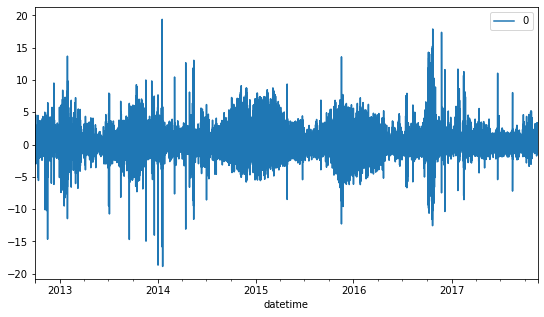

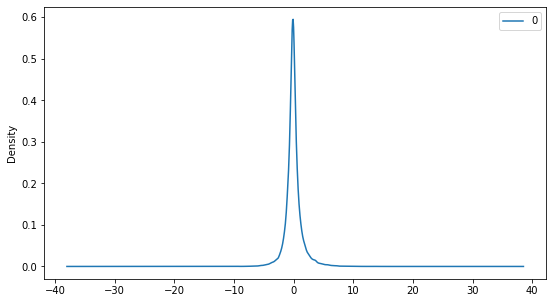

                  0
count  4.495200e+04
mean  -1.241473e-07
std    1.434884e+00
min   -1.887999e+01
25%   -5.606687e-01
50%   -9.286403e-02
75%    4.348109e-01
max    1.939602e+01


In [ ]:
# ARMA example
from statsmodels.tsa.arima_model import ARIMA
# fit model

model = ARIMA(train2,order =(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())


In [ ]:
u = train2.values
history = [x for x in u]

In [ ]:
predictions = []
for i in range(len(test2)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test2.loc[test2.index[i],'Los Angeles']
  history.append(obs)
  #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test2, predictions))
print('Test RMSE: %.3f' % rmse)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



Test RMSE: 1.315


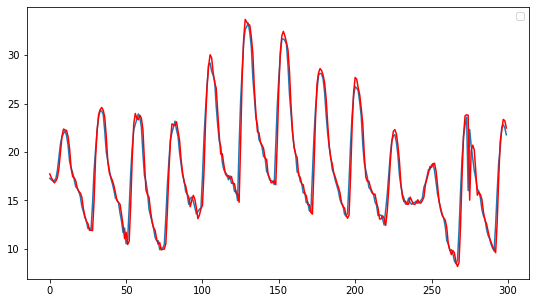

In [ ]:
# plot forecasts against actual outcomes
plt.plot(test2.values)
plt.plot(predictions, color='red')
plt.legend()
plt.show()

## **RNN - LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.utils import plot_model

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (20, 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

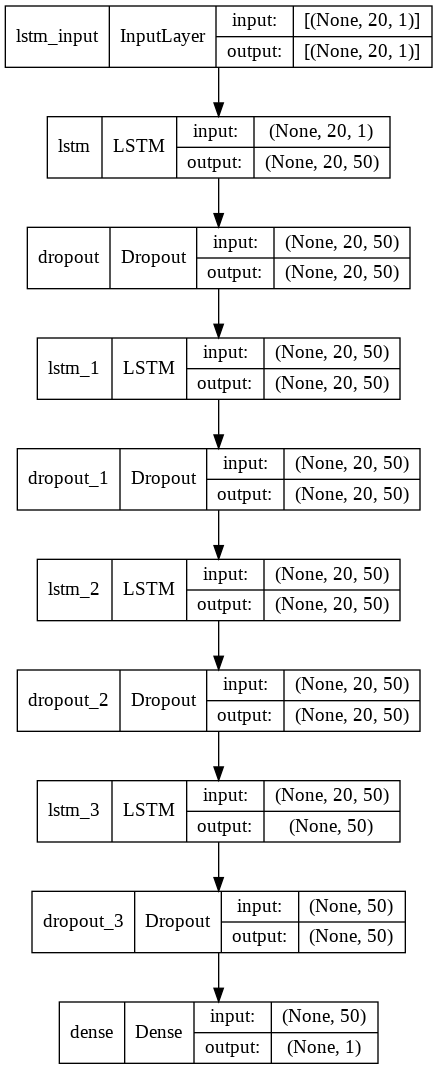

In [ ]:
plot_model(regressor, show_shapes=True)

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',mode = 'auto',verbose=1,patience=8)
history = regressor.fit(X_train , y_train , epochs = 100, batch_size = 32 ,validation_split=0.2 , callbacks=[es])

Epoch 1/100
250/250 [==============================] - 9s 35ms/step - loss: 3.0320 - val_loss: 0.4288
Epoch 2/100
250/250 [==============================] - 9s 36ms/step - loss: 3.0596 - val_loss: 0.5478
Epoch 3/100
250/250 [==============================] - 9s 35ms/step - loss: 3.0070 - val_loss: 0.6368
Epoch 4/100
250/250 [==============================] - 9s 35ms/step - loss: 2.9576 - val_loss: 0.6023
Epoch 5/100
250/250 [==============================] - 9s 35ms/step - loss: 2.8880 - val_loss: 0.7016
Epoch 6/100
250/250 [==============================] - 9s 35ms/step - loss: 2.9811 - val_loss: 0.4794
Epoch 7/100
250/250 [==============================] - 9s 35ms/step - loss: 2.9058 - val_loss: 0.5915
Epoch 8/100
250/250 [==============================] - 9s 35ms/step - loss: 2.9748 - val_loss: 0.5522
Epoch 9/100
250/250 [==============================] - 9s 35ms/step - loss: 2.8317 - val_loss: 0.4910
Epoch 00009: early stopping


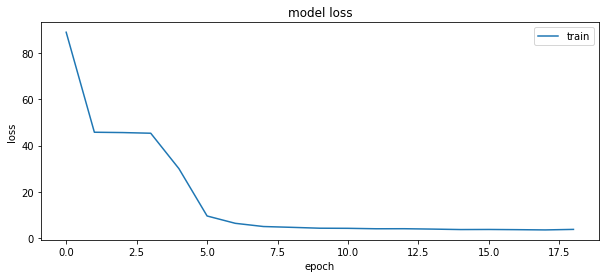

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
ypred = regressor.predict(X_test)
errors = math.sqrt(mean_squared_error(y_test, ypred))
f"rmse = {errors}."

'rmse = 0.8315475925069586.'

## **CNN**

In [ ]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(20, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

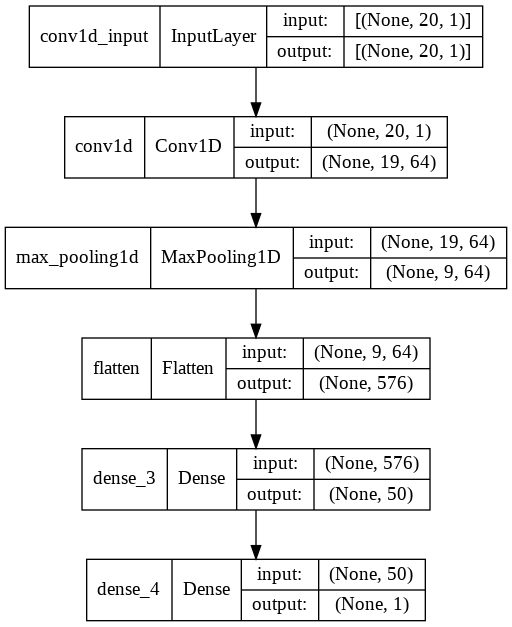

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
history = model.fit(X_train, y_train, epochs=200, verbose=1, batch_size = 32 ,validation_split=0.2)

Epoch 1/200
250/250 [==============================] - 1s 4ms/step - loss: 11.6392 - val_loss: 1.5765
Epoch 2/200
250/250 [==============================] - 1s 3ms/step - loss: 2.6649 - val_loss: 1.6484
Epoch 3/200
250/250 [==============================] - 1s 3ms/step - loss: 2.4284 - val_loss: 1.2089
Epoch 4/200
250/250 [==============================] - 1s 3ms/step - loss: 2.4009 - val_loss: 1.5916
Epoch 5/200
250/250 [==============================] - 1s 3ms/step - loss: 2.3625 - val_loss: 1.0728
Epoch 6/200
250/250 [==============================] - 1s 3ms/step - loss: 2.1422 - val_loss: 1.1752
Epoch 7/200
250/250 [==============================] - 1s 3ms/step - loss: 2.1130 - val_loss: 1.1176
Epoch 8/200
250/250 [==============================] - 1s 3ms/step - loss: 2.0183 - val_loss: 1.0746
Epoch 9/200
250/250 [==============================] - 1s 3ms/step - loss: 2.0137 - val_loss: 1.6022
Epoch 10/200
250/250 [==============================] - 1s 3ms/step - loss: 2.0456 - val_l

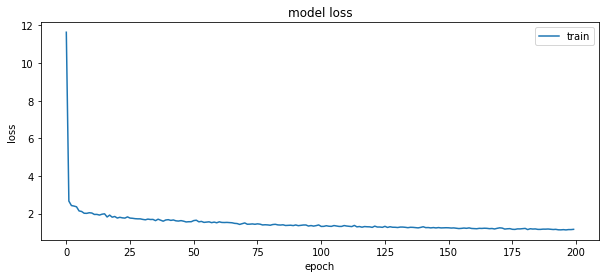

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
ypred = model.predict(X_test)
errors = math.sqrt(mean_squared_error(y_test, ypred))
f"rmse = {errors}."

'rmse = 0.9250944819515146.'

## **Prophet**

In [ ]:
import fbprophet
from fbprophet import Prophet
m = Prophet()
train2.columns = ['ds', 'y']
m.fit(train2)

In [ ]:
test2.columns = ['ds','y']
feature = pd.DataFrame(test2['ds'])
feature

,ds
37260,2017-01-01 00:00:00
37261,2017-01-01 01:00:00
37262,2017-01-01 02:00:00
37263,2017-01-01 03:00:00
37264,2017-01-01 04:00:00
...,...
45248,2017-11-29 20:00:00
45249,2017-11-29 21:00:00
45250,2017-11-29 22:00:00
45251,2017-11-29 23:00:00


In [ ]:
forecast = m.predict(feature)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2017-01-01 00:00:00,-1.721314,-7.237963,3.665602
1,2017-01-01 01:00:00,-2.375945,-7.887312,3.358562
2,2017-01-01 02:00:00,-2.967220,-8.721849,2.634464
3,2017-01-01 03:00:00,-3.477706,-9.178101,2.161220
4,2017-01-01 04:00:00,-3.905280,-9.226852,2.035017
...,...,...,...,...
7988,2017-11-29 20:00:00,1.572398,-8.223599,11.404505
7989,2017-11-29 21:00:00,1.398183,-8.275918,11.187977
7990,2017-11-29 22:00:00,0.985577,-9.169620,10.497328
7991,2017-11-29 23:00:00,0.399352,-8.545035,10.483595


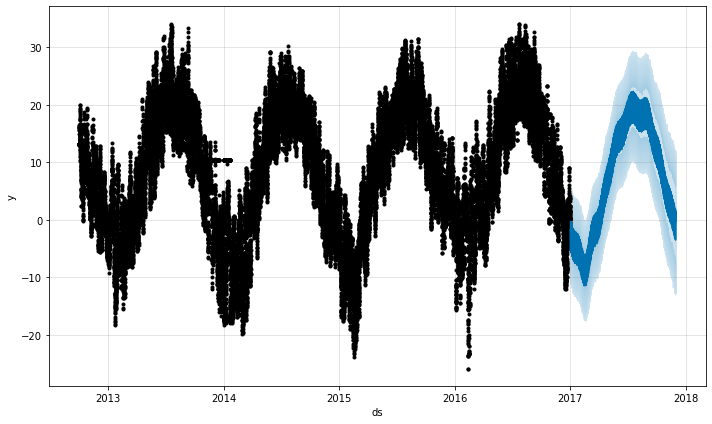

In [ ]:
fig1 = m.plot(forecast)

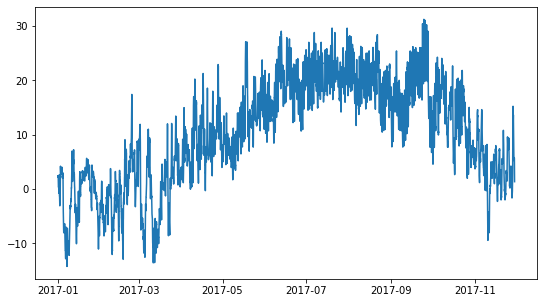

In [ ]:
plt.plot(test2['ds'],test2['y'])

In [ ]:
diff = pd.merge(forecast,test2 ,on="ds")
diff

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y
0,2017-01-01 00:00:00,8.200204,-7.237963,3.665602,8.200204,8.200204,-9.921518,-9.921518,-9.921518,0.970470,0.970470,0.970470,-0.088039,-0.088039,-0.088039,-10.803949,-10.803949,-10.803949,0.0,0.0,0.0,-1.721314,2.44
1,2017-01-01 01:00:00,8.199746,-7.887312,3.358562,8.199746,8.199746,-10.575691,-10.575691,-10.575691,0.335762,0.335762,0.335762,-0.097694,-0.097694,-0.097694,-10.813759,-10.813759,-10.813759,0.0,0.0,0.0,-2.375945,2.19
2,2017-01-01 02:00:00,8.199288,-8.721849,2.634464,8.199288,8.199288,-11.166508,-11.166508,-11.166508,-0.235686,-0.235686,-0.235686,-0.107260,-0.107260,-0.107260,-10.823562,-10.823562,-10.823562,0.0,0.0,0.0,-2.967220,2.41
3,2017-01-01 03:00:00,8.198830,-9.178101,2.161220,8.198830,8.198830,-11.676536,-11.676536,-11.676536,-0.726485,-0.726485,-0.726485,-0.116694,-0.116694,-0.116694,-10.833357,-10.833357,-10.833357,0.0,0.0,0.0,-3.477706,2.42
4,2017-01-01 04:00:00,8.198372,-9.226852,2.035017,8.198372,8.198372,-12.103651,-12.103651,-12.103651,-1.134557,-1.134557,-1.134557,-0.125950,-0.125950,-0.125950,-10.843144,-10.843144,-10.843144,0.0,0.0,0.0,-3.905280,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7988,2017-11-29 20:00:00,4.539887,-8.223599,11.404505,-2.731430,12.133856,-2.967489,-2.967489,-2.967489,2.750782,2.750782,2.750782,0.010499,0.010499,0.010499,-5.728770,-5.728770,-5.728770,0.0,0.0,0.0,1.572398,5.59
7989,2017-11-29 21:00:00,4.539429,-8.275918,11.187977,-2.733098,12.133827,-3.141245,-3.141245,-3.141245,2.590590,2.590590,2.590590,0.004998,0.004998,0.004998,-5.736833,-5.736833,-5.736833,0.0,0.0,0.0,1.398183,5.60
7990,2017-11-29 22:00:00,4.538971,-9.169620,10.497328,-2.734767,12.133799,-3.553394,-3.553394,-3.553394,2.191532,2.191532,2.191532,-0.000044,-0.000044,-0.000044,-5.744882,-5.744882,-5.744882,0.0,0.0,0.0,0.985577,4.40
7991,2017-11-29 23:00:00,4.538512,-8.545035,10.483595,-2.736435,12.133770,-4.139160,-4.139160,-4.139160,1.618359,1.618359,1.618359,-0.004603,-0.004603,-0.004603,-5.752917,-5.752917,-5.752917,0.0,0.0,0.0,0.399352,3.01


In [ ]:
diff = diff[['ds','y','yhat']]
diff

,ds,y,yhat
0,2017-01-01 00:00:00,2.44,-1.721314
1,2017-01-01 01:00:00,2.19,-2.375945
2,2017-01-01 02:00:00,2.41,-2.967220
3,2017-01-01 03:00:00,2.42,-3.477706
4,2017-01-01 04:00:00,1.77,-3.905280
...,...,...,...
7988,2017-11-29 20:00:00,5.59,1.572398
7989,2017-11-29 21:00:00,5.60,1.398183
7990,2017-11-29 22:00:00,4.40,0.985577
7991,2017-11-29 23:00:00,3.01,0.399352


In [ ]:
rmse = math.sqrt(mean_squared_error(diff['y'], diff['yhat']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5.674
